In [1]:
import warnings
import pandas as pd 
import seaborn as sea
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=UserWarning)

In [3]:
from yellowbrick.classifier import (
    ROCAUC,
    PrecisionRecallCurve
)
from imblearn.under_sampling import RandomUnderSampler

In [4]:
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV    ,
    StratifiedKFold
    )
from sklearn.metrics         import *
from sklearn.datasets        import fetch_openml
from sklearn.base            import clone

In [5]:
mnist = fetch_openml('mnist_784',version=1)

In [6]:
X:pd.DataFrame = mnist['data']
Y:pd.DataFrame = mnist['target'].astype(int)

In [7]:
under = RandomUnderSampler(random_state=0)

In [8]:
Xunder , Yunder = under.fit_resample(X,Y)

In [9]:
xtrain , xtest , ytrain , ytest = train_test_split(Xunder,Yunder,test_size=11_000,random_state=0)

In [10]:
params = dict(
    n_neighbors = [9],
    weights     = ['distance'],
    p = [2,3,4,5,9]
)
gridKnn = GridSearchCV(KNeighborsClassifier(),param_grid=params,scoring='accuracy',verbose=1) 
gridKnn.fit(X,Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
print(gridKnn.best_estimator_)
print(gridKnn.best_score_)

KNeighborsClassifier(n_neighbors=9, weights='distance')
0.9635714285714285


In [ ]:
knn = KNeighborsClassifier(n_neighbors=9,weights='distance')

In [ ]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [ ]:
pred = knn.predict(xtest)

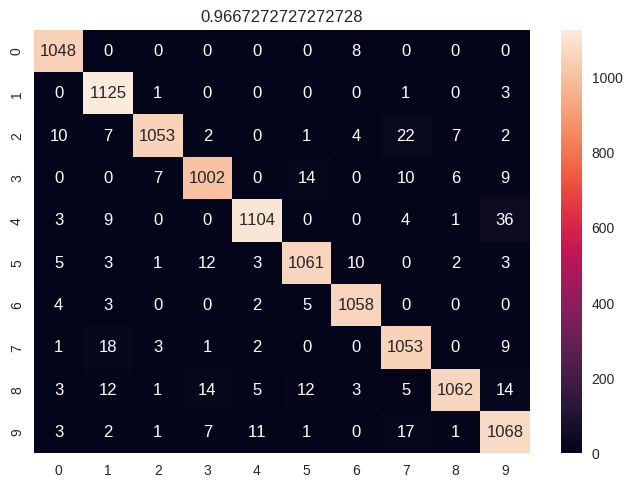

In [ ]:
sea.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='')
plt.title(accuracy_score(ytest,pred))
plt.show()

In [ ]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1056
           1       0.95      1.00      0.97      1130
           2       0.99      0.95      0.97      1108
           3       0.97      0.96      0.96      1048
           4       0.98      0.95      0.97      1157
           5       0.97      0.96      0.97      1100
           6       0.98      0.99      0.98      1072
           7       0.95      0.97      0.96      1087
           8       0.98      0.94      0.96      1131
           9       0.93      0.96      0.95      1111

    accuracy                           0.97     11000
   macro avg       0.97      0.97      0.97     11000
weighted avg       0.97      0.97      0.97     11000



In [ ]:
kfold = StratifiedKFold(4,shuffle=True,random_state=5) 

for train , test in kfold.split(X,Y):
    Xfold , Yfold  = X.iloc[train], Y.iloc[test]

    
    under = RandomUnderSampler(random_state=0)
    Xunder , Yunder = under.fit_resample(Xfold,Yfold)

    xtrainf , xtestf , ytrainf , ytestf = train_test_split(Xunder,Yunder)

Sem UnderSampling

In [ ]:
xtrain , xtest , ytrain , ytest = train_test_split(X,Y,random_state=0,test_size=10_000)

In [ ]:
knn = clone(knn)

In [ ]:
knn.fit(xtrain,ytrain)
pred = knn.predict(xtest)

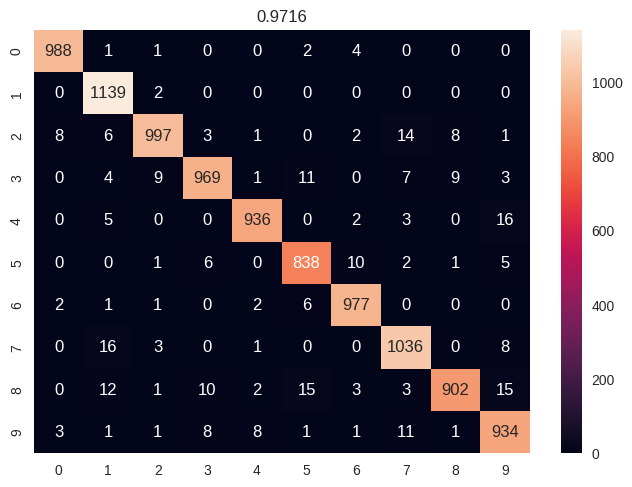

In [ ]:
sea.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='')
plt.title(accuracy_score(ytest,pred))
plt.show()

In [ ]:
print(classification_report(ytest,pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       996
           1       0.96      1.00      0.98      1141
           2       0.98      0.96      0.97      1040
           3       0.97      0.96      0.96      1013
           4       0.98      0.97      0.98       962
           5       0.96      0.97      0.97       863
           6       0.98      0.99      0.98       989
           7       0.96      0.97      0.97      1064
           8       0.98      0.94      0.96       963
           9       0.95      0.96      0.96       969

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

